# Speed of sound

Needs to run after: `anl/mics_pulses.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rc('font', size=15)
plt.rc('figure', figsize=(12, 9))

import datarepo

In [2]:
from datarepo import byu_ch, byu_chpmap
byu_mics = datarepo.get_byu_mics()
pos = datarepo.get_pos()
summ = datarepo.get_byu_mics_summ()
summ.head()

pad  ch  blast  pmax  tmax  pmin  tmin    noise  ts  tarr  ...  hlabel  \
0    1   0      1   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
1    1   0      2   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
2    1   0      3   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
3    1   0      4   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
4    1   0      5   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   

   ppf46  alpha  depth      dbar   dredbar    t          c  Ea  σEa  
0    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
1    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
2    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
3    NaN    NaN    0.6  0.007910       NaN  1.5  341.29036 NaN  NaN  
4    NaN    NaN    0.6  0.007910       NaN  1.5  341.29036 NaN  NaN  

[5 rows x 31 columns]

In [3]:
def get_pulses(padn, idx):
    pad = byu_mics[f'pad{padn}']
    qs = f'pad == {padn} & blast == 1 & ch == '
    p = {}
    for ch in idx:
        try:
            sel = summ.query(qs + str(ch)).iloc[0]
        except IndexError:
            print('error: summ', ch)
            continue
        try:
            start = np.where(pad[ch]['t'] >= sel['ts'])[0][0]
            end = np.where(pad[ch]['t'] >= sel['t2'])[0][0]
        except ValueError:
            print('error: start/end', ch)
            continue
        except IndexError:
            print('error: start/end', ch)
            continue
        p[ch] = (pad[ch]['t'][start:end], pad[ch]['x'][start:end],
                 sel['ts'], sel['r'])
    return p

In [4]:
def linear(x, a, b):
    return a * x + b

In [5]:
def plot_pulsert(ax, r0):
    amp = 30.

    for ch, (t, pr, ts, r) in p.items():
        pn = pr / np.abs(pr).max()
        ax.plot(t, amp * pn + r, label=str(ch))

    xp = np.linspace(-r0 / c, 1.8, 50)
    yp = linear(xp, c, r0)
    ax.plot(xp, yp, color='black', ls='dashed')
    ax.set_xlabel(r'$t\ /\ \mathrm{s}$')
    ax.set_ylabel(r'$r\ /\ \mathrm{m}$')
    ax.legend(title='channel', loc='upper left', bbox_to_anchor=(1.05, 1.))

In [6]:
fs = byu_mics['pad1'][0]['fs']
fs

204800.0

In [7]:
idx = np.concatenate((byu_ch['rline']['l'], byu_ch['rline']['h']))
idx = idx[idx != 14]  # remove channel 14, because of noise
idx

array([ 6, 15, 16, 18, 20, 24, 26, 28,  7, 22, 17, 19, 21, 25, 27, 29])

In [8]:
summ['c'] = np.nan

## Pad 1

In [9]:
p = get_pulses(1, idx)

error: start/end 18
error: summ 20
error: start/end 26
error: start/end 22
error: start/end 29


In [10]:
tss = np.array([el[2] for el in p.values()])
rs = np.array([el[3] for el in p.values()])
res = curve_fit(linear, tss, rs, p0=[340., -200])
c, r0 = res[0]
σc, σr0 = np.sqrt(res[1].diagonal())
c, σc, r0, σr0

(341.2903598047282, 3.867777312557089, -272.52229294900343, 4.918430248843308)

In [13]:
fig, ax = plt.subplots()

plot_pulsert(ax, r0)
# fig

In [14]:
summ.loc[summ['pad'] == 1, 'c'] = c

## Pad 2

In [15]:
p = get_pulses(2, idx)

error: summ 20


In [16]:
tss = np.array([el[2] for el in p.values()])
rs = np.array([el[3] for el in p.values()])
res = curve_fit(linear, tss, rs, p0=[340., -200])
c, r0 = res[0]
σc, σr0 = np.sqrt(res[1].diagonal())
c, σc, r0, σr0

(344.98058041272543, 2.728166660605614, -279.7965427783639, 3.5945698000512962)

In [17]:
fig, ax = plt.subplots()

plot_pulsert(ax, r0)
# fig

In [18]:
summ.loc[summ['pad'] == 2, 'c'] = c

## Pad 3

In [19]:
p = get_pulses(3, idx)

error: summ 20
error: start/end 21
error: start/end 29


In [20]:
tss = np.array([el[2] for el in p.values()])
rs = np.array([el[3] for el in p.values()])
res = curve_fit(linear, tss, rs, p0=[340., -200])
c, r0 = res[0]
σc, σr0 = np.sqrt(res[1].diagonal())
c, σc, r0, σr0

(349.1306590740928, 1.886336431928037, -286.79893822569665, 2.4101298641003144)

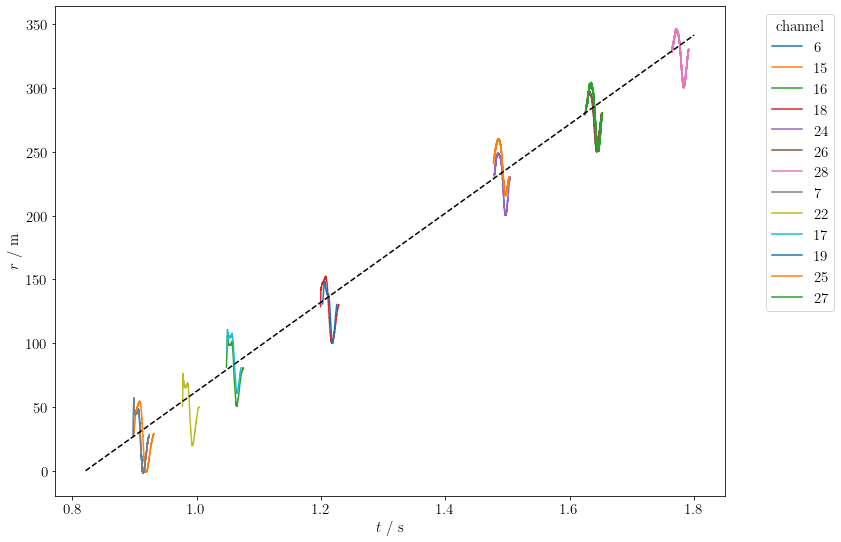

In [21]:
fig, ax = plt.subplots()

plot_pulsert(ax, r0)
# fig

In [22]:
summ.loc[summ['pad'] == 3, 'c'] = c

## Pad 4

In [23]:
p = get_pulses(4, idx)

error: summ 20
error: summ 7
error: start/end 25


In [24]:
tss = np.array([el[2] for el in p.values()])
rs = np.array([el[3] for el in p.values()])
res = curve_fit(linear, tss, rs, p0=[340., -200])
c, r0 = res[0]
σc, σr0 = np.sqrt(res[1].diagonal())
c, σc, r0, σr0

(350.38694533184656, 3.016262345201043, -291.2285559525591, 4.043384457019343)

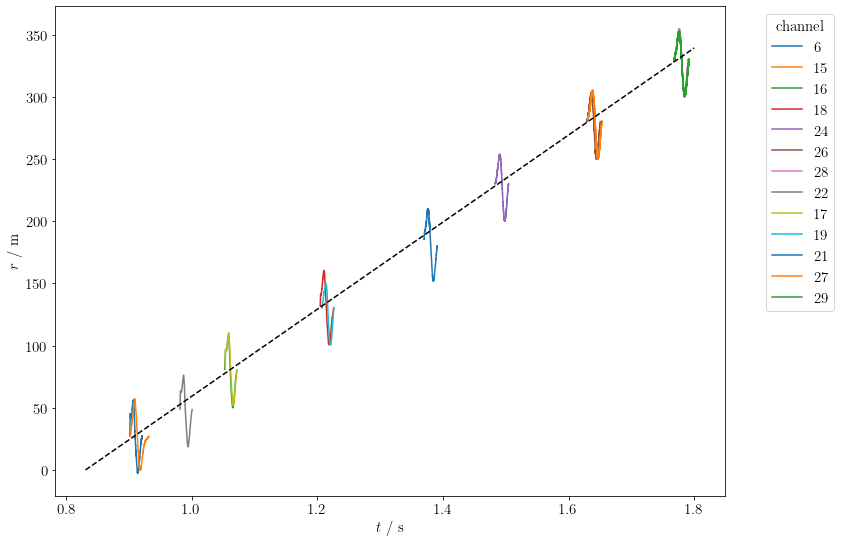

In [25]:
fig, ax = plt.subplots()

plot_pulsert(ax, r0)
# fig

In [26]:
summ.loc[summ['pad'] == 4, 'c'] = c

In [27]:
summ.head()

pad  ch  blast  pmax  tmax  pmin  tmin    noise  ts  tarr  ...  hlabel  \
0    1   0      1   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
1    1   0      2   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
2    1   0      3   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
3    1   0      4   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   
4    1   0      5   0.0   0.0   0.0   0.0  0.03412 NaN   NaN  ...       -   

   ppf46  alpha  depth      dbar   dredbar    t          c  Ea  σEa  
0    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
1    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
2    NaN    NaN    0.3  0.003955  0.003955  0.0  341.29036 NaN  NaN  
3    NaN    NaN    0.6  0.007910       NaN  1.5  341.29036 NaN  NaN  
4    NaN    NaN    0.6  0.007910       NaN  1.5  341.29036 NaN  NaN  

[5 rows x 31 columns]

## Write *c* column to `asdf` summ